In [ ]:
import pandas as pd

# Load the data
file_path = "/content/drive/MyDrive/BDM Capstone/Processed Raw data/namewise taloiring data - Sheet1.csv"  # Replace with the actual file path
tailor_data = pd.read_csv(file_path)
# Assuming 'name' is the column containing names
tailor_data.loc[tailor_data['name'] == 'Munna Master', 'reliable'] = True

# Display the first few rows of the dataframe
tailor_data.head()


,name,Sum of quantity_in_(Pc),Sum of expected_quantity_in(pc),differnce,error margin,if in the error range,Quantitave reliability score(50),Qalitative reliable score(50),net score(100),reliable
0,Aman Narga,8423,5408,3015,2933,False,22.884052,35,57,False
1,Chhotu Bhaiya,5432,4896,536,462,False,45.282248,40,85,True
2,Hawda,12208,10712,1496,1335,False,43.768432,40,83,True
3,Hayat,7367,7500,-133,-21,True,50.000000,50,100,True
4,Kutub,320,278,42,37,True,50.000000,50,100,True


<ipython-input-7-9f9a617009ac>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(x='name', y='net score(100)', hue='reliable', data=tailor_data, ci='sd')


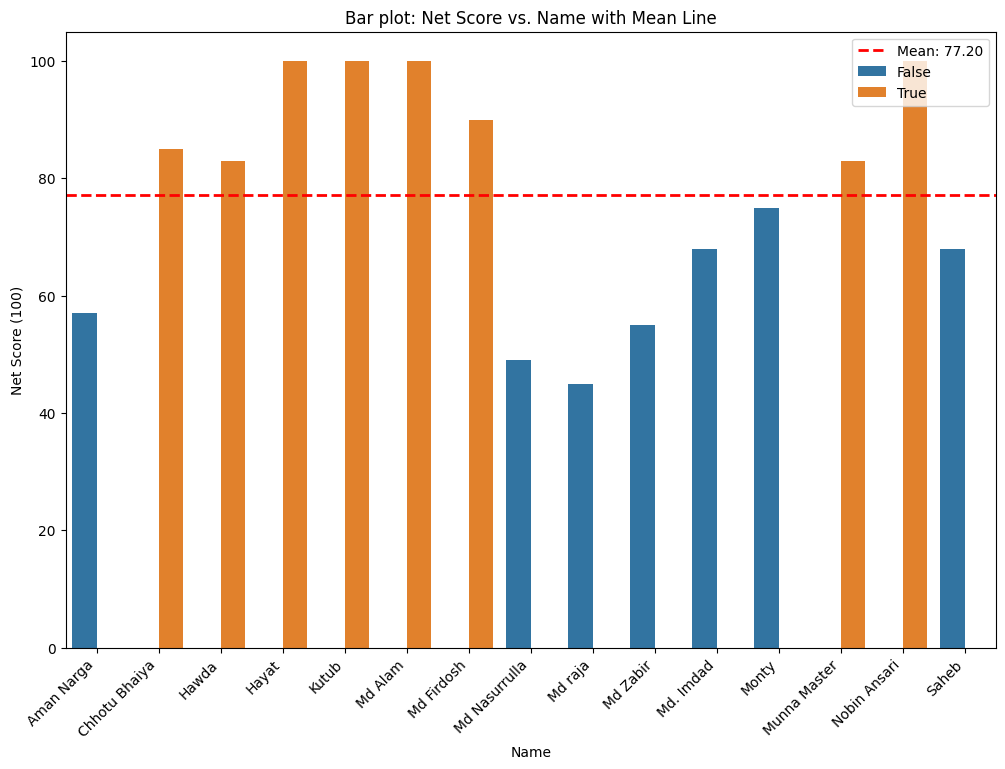

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.pyplot as plt
import seaborn as sns

# Bar plot with mean line: Net Score vs. Name with hue being 'reliable'
plt.figure(figsize=(12, 8))
sns.barplot(x='name', y='net score(100)', hue='reliable', data=tailor_data, ci='sd')
plt.title('Bar plot: Net Score vs. Name with Mean Line')
plt.xlabel('Name')
plt.ylabel('Net Score (100)')

# Adding mean line
mean_line = tailor_data['net score(100)'].mean()
plt.axhline(mean_line, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_line:.2f}')
plt.legend()

plt.xticks(rotation=45, ha='right')  # Adjust rotation for better readability
plt.show()


In [ ]:
tailor_data[['name','differnce', 'error margin', 'Quantitave reliability score(50)', 'Qalitative reliable score(50)', 'net score(100)', 'reliable']]

,name,differnce,error margin,Quantitave reliability score(50),Qalitative reliable score(50),net score(100),reliable
0,Aman Narga,3015,2933,22.884052,35,57,False
1,Chhotu Bhaiya,536,462,45.282248,40,85,True
2,Hawda,1496,1335,43.768432,40,83,True
3,Hayat,-133,-21,50.000000,50,100,True
4,Kutub,42,37,50.000000,50,100,True
5,Md Alam,202,19,50.000000,50,100,True
6,Md Firdosh,518,448,45.193920,45,90,True
7,Md Nasurrulla,1617,1504,39.971461,10,49,False
8,Md raja,2608,2483,35.029904,10,45,False
9,Md Zabir,842,713,45.862170,10,55,False


Regression Line Equation: y = 0.69x + 955.46
Root Mean Squared Error (RMSE): 1587.46
R-squared (R2): 0.26


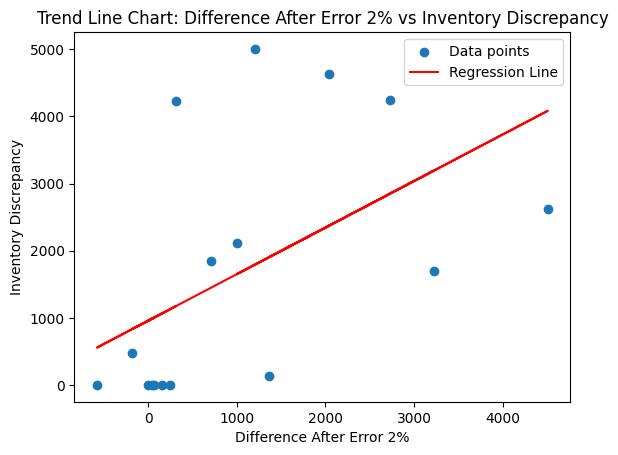

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

# Load the CSV data into a DataFrame
# Replace 'your_data.csv' with the actual name of your CSV file
df = pd.read_csv('/content/drive/MyDrive/BDM Capstone/Processed Raw data/monthwise taloiring data - Sheet1.csv')

# Rename the column with a special character
df = df.rename(columns={'difference after error 2%': 'difference_after_error_2'})


# Perform a linear regression analysis
X = df[['difference_after_error_2']]
y = df['inventory descrepancy']

# Create a linear regression model
model = LinearRegression()

# Fit the model to the data
model.fit(X, y)

# Get the coefficients of the model
slope = model.coef_[0]
intercept = model.intercept_
# Evaluate the model
rmse = sqrt(mean_squared_error(y, y_pred))
r2 = r2_score(y, y_pred)

# Print the equation of the regression line
print(f'Regression Line Equation: y = {slope:.2f}x + {intercept:.2f}')
# Print model evaluation metrics
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

# Create a trend line chart
plt.scatter(X, y, label='Data points')
plt.plot(X, model.predict(X), color='red', label='Regression Line')
plt.title('Trend Line Chart: Difference After Error vs Inventory Discrepancy')
plt.xlabel('Difference After Error 2%')
plt.ylabel('Inventory Discrepancy')
plt.legend()
plt.show()
